In [61]:
%matplotlib inline
import pylab as pl
pl.style.use('dark_background')
from astropy.visualization import quantity_support

In [62]:
from scipy.integrate import quad, solve_ivp

# Index

* [Part 1: Surface Pressure](#Part-1:-Surface-Pressure)
* [Part 2: Maximum Surface Pressure](#Part-2:-Maximum-surface-pressure)
* [Part 3: Density Structure](#Part-3:-Density-Structure)
* [Part 4: Nondimensional](#Part-4:-Poisson-equation---derive-nondimensional-isothermal-Lane-Emden-Equation)
* [Part 5: Numerical Integration](#Part-5:-Numerical-Integration)
* [Part 6: Enclosed Mass](#Part-6:-Enclosed-Mass)
* [Part 7: Dimensionless Mass](#Part-7:-Dimensionless-Mass)
* [Part 8: Pressure at max mass](#Part-8:-Pressure-for-max-mass)
* [Part 9: Bonnor-Ebert Mass](#Part-9:-BE-Mass)
* [Part 10: Size & Density](#Part-10:-Size-and-Density)
* [Part 11: Density structure](#Part-11.-Density-Structure,-now-with-dimensions)
 * [Density Profile Discrepancy](#Density-Profile-Discrepancy)
 * [GC case](#Re-evaluate-for-Galactic-Center-like-case)
* [Part 12: Numerical Approximation](#Part-12:-Numerical-Approximation)
 * [GC case](#Numerical-Approximation:-Galactic-Center-case)
* [Part 13: B68 stability](#B68:-Is-it-stable?)
* [Part 14: B68 central density](#B68:-What-is-$\rho_c$?)
* [Part 15: B68 pressure vs ISM](#B68:-Compare-pressure-to-ISM)

# Part 1: Surface Pressure

[Index](#Index)   

 For the moment, assume that the gas density inside the sphere is uniform.
    Use the virial theorem to derive a relationship between $P_{\mathrm{s}}$
    and the cloud radius $R$. 
    Recall:
    $$\frac{1}{2}\ddot{I} = 2 (\mathcal{T} - \mathcal{T}_S) + \mathcal{W}$$
    $\mathcal{T}_S$ is the average surface pressure, given by
    $$\mathcal{T}_S = \int_S r P dS = r P \int_S dS = 4 \pi R^2 R P_S = 4 \pi R^3 P_S$$
    assuming a sphere with a constant surface pressure term. 
    
 

$\mathcal{W}$ is the gravitational potential
 $$\mathcal{W} = -a \frac{GM^2}{R}$$


### Solution

$$2 (\mathcal{T} - \mathcal{T}_S) + \mathcal{W} = 0$$

$$2\left( \frac{3}{2} M c_s^2 - 4 \pi R^3 P_S\right) - a \frac{GM^2}{R} = 0$$

$$\left( 3 M c_s^2 - 8 \pi R^3 P_S\right) - a \frac{GM^2}{R} = 0$$

$$P_S = \frac{a GM^2}{8 \pi R^4 } - \frac{3 M c_s^2}{8 \pi R^3} = \frac{1}{8 \pi R^3} \left(3 M c_s^2 - \frac{a G M^2}{R}\right)$$

for $a=3/5$, 
$$P_S = \frac{3 GM^2}{40 \pi R^4 } - \frac{3 M c_s^2}{8 \pi R^3} = \frac{1}{8 \pi R^3} \left(3 M c_s^2 - \frac{3 G M^2}{5 R}\right)
 = \frac{3}{8 \pi R^3} \left( M c_s^2 - \frac{ G M^2}{5 R}\right) = \frac{3 M c_s^2}{8 \pi} \left( \frac{1}{R^3} - \frac{ G M}{5 c_s^2} \frac{1}{R^4}\right)$$

# Part 2: Maximum surface pressure

[Index](#Index)

Show that there is a maximum surface pressure $P_{\mathrm{s,max}}$ for
    which virial equilibrium is possible and derive its value.
    (find an extremum of $P_S(R)$ with respect to $R$)


$$\frac{d P_S}{dR} = \frac{a GM^2}{2 \pi R^5 } - \frac{9 M c_s^2}{8 \pi R^4} = 0$$

$$\frac{a GM^2}{2 \pi } - \frac{9 M c_s^2 R }{8 \pi} = 0$$

$$R(P_{S,max}) = \frac{4 a GM}{9 c_s^2 }$$

for $a=\frac{3}{5}$,
$$R(P_{S,max}) = \frac{4  GM}{15 c_s^2 }$$

$$P_{S,max} = -\frac{a G M^2}{8 \pi} \left(\frac{9 c_s^2}{4 a G M}\right)^4 + \frac{3 M c_s^2}{8\pi} \left(\frac{9 c_s^2}{4 a G M}\right)^3$$

$$P_{S,max} = -\frac{3^8 c_s^8 }{2^{11} G^3 M^2 a^3 \pi} + \frac{3^7 c_s^8}{2^9 M^2 G^3 \pi a^3} $$

$$P_{S,max} = \left(\frac{3^7}{2^9} - \frac{3^8}{2^{11}}\right) \frac{c_s^8}{\pi a^3 G^3 M^2} $$

In [63]:
-(3**8/2**11-3**7/2**9)

1.06787109375

$$P_{S,max} = 1.07 \frac{c_s^8}{\pi a^3 G^3 M^2} $$

In [64]:
-(3**8/2**11-3**7/2**9) / (3/5.)**3

4.943847656250001

$$P_{S,max} = 4.94 \frac{c_s^8}{\pi G^3 M^2} $$

In [65]:
psmax_scale = -(3**8/2**11-3**7/2**9) / (3/5.)**3 / np.pi
psmax_scale

1.573675584770938

$$P_{S,max} = 1.574 \frac{c_s^8}{G^3 M^2} $$

# Part 3: Density Structure

[Index](#Index)


Now we will compute the true density structure. Consider first the equation of hydrostatic balance,
$$-\frac{1}{\rho}\frac{d}{dr} P = \frac{d}{dr} \phi$$
where $P = \rho c_s^2$ is the pressure and $\phi$ is the gravitational
potential. Let $\rho_c$ be the density at $r=0$, and choose a solution such that
$\phi = 0$ at $r=0$. Integrate the equation of hydrostatic balance to obtain an
expression relating $\rho$, $\rho_c$, and $\phi$.

(recall: $\frac{d }{dx}\left(\ln y(x)\right) = \frac{1}{y} \frac{d y}{dx}$)



$$P = \rho c_s^2$$
$$-\frac{1}{\rho} \frac{d}{dr} \rho c_s^2 = \frac{d}{dr}\phi$$

$$-c_s^2 \frac{d}{dr} \ln \rho = \frac{d}{dr}\phi$$

$$-c_s^2 \ln \rho = \phi + C$$
$$\rho = e^{-\phi/c_s^2+C} = C e^{-\phi/c_s^2}$$

$$\rho(r=0) = C e^{0} = \rho_c$$
$$C = \rho_c $$

$$\rho =  \rho_c e^{-\phi/c_s^2}$$

# Part 4: Poisson equation - derive nondimensional isothermal Lane-Emden Equation

[Index](#Index)


Now consider the Poisson equation for the potential,
$$\frac{1}{r^2}\frac{d}{dr}\left(r^2 \frac{d\phi}{dr}\right) = 4 \pi G \rho$$
Use your result from the previous part to eliminate $\rho$, and define $\psi \equiv \phi/c_s^2$. Show that the resulting equation can be non-dimensionalized to give the isothermal Lane-Emden equation:
$$\frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2 \frac{d\psi}{d\xi}\right) = e^{-\psi}.
$$
where $\xi = r/r_0$. What value of $r_0$ is required to obtain this equation?



#### Substitute  $\xi = r/r_0$
into
$$\frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2 \frac{d\psi}{d\xi}\right) = e^{-\psi}$$

$$\frac{r_0^2}{r^2}\frac{r_0 d}{dr}\left(\left(\frac{r}{r_0}\right)^2 \frac{r_0 d\psi}{dr}\right) = e^{-\psi}$$

$$r_0^2 \frac{1}{r^2}\frac{d}{dr}\left(r^2 \frac{d\psi}{dr}\right) = e^{-\psi}$$

substitute $\psi = \frac{\phi}{c_s^2}$
$$\frac{r_0^2}{c_s^2} \frac{1}{r^2}\frac{d}{dr}\left(r^2 \frac{d\phi}{dr}\right) = e^{-\phi/c_s^2}$$

substitute $\rho =  \rho_c e^{-\phi/c_s^2}$
$$\frac{r_0^2}{c_s^2} \frac{1}{r^2}\frac{d}{dr}\left(r^2 \frac{d\phi}{dr}\right) = \frac{\rho}{\rho_c}$$

Rearrange
$$ \frac{1}{r^2}\frac{d}{dr}\left(r^2 \frac{d\phi}{dr}\right) =\frac{c_s^2}{r_0^2} \frac{\rho}{\rho_c}$$

By symmetry, then, we have

$$ \frac{c_s^2}{\rho_c r_0^2} = 4 \pi G$$

which rearranges to
$$ r_0 = \sqrt{\frac{c_s^2}{\rho_c 4 \pi G}}$$

# Part 5: Numerical Integration

[Index](#Index)

$$\frac{1}{r^2} \frac{d}{dr} \left(r^2 \frac{d \psi}{dr}\right) = e^{-\psi}$$

Eqn 1:

$$ \psi ' = \frac{d\psi}{dr} $$
$$\frac{d \psi '}{dr} = -2\frac{\psi '}{r} + e^{-\psi}$$

Boundary conditions:  $\psi = 0$, $\frac{d\psi}{dr} = 0$ at $r=0$

$$\psi = a_0 + a_1 z + a_2 z^2 + a_3 z^3 + ...$$ near $r=0$

We get $a_0=0$ and $a_1=0$ from the boundary conditions $\phi(0)=\phi'(0)=0$

Near $r=$ zero, then:
    
$$\frac{d\psi}{dr} = 2 a_2 r + 3 a_3 r^2$$
$$\frac{d^2\psi}{dr^2} = 2 a_2 + 6 a_3 r$$


$$\frac{1}{r^2} \frac{d}{dr}\left(r^2 (2 a_2 r + 3 a_3 r^2) \right) = e^{\psi}$$

$$\frac{1}{r^2} \frac{d}{dr}\left( 2 a_2 r^3 + 3 a_3 r^4 \right) = e^{\psi}$$

$$\frac{1}{r^2} \left(6 a_2 r^2 + 12 a_3 r^3 \right) = e^{\psi}$$

$$ \left(6 a_2 + 12 a_3 r \right) = e^{\psi} = 1 $$

using $r=0$:
$$ 6 a_2  = 1 $$ so $$a_2 = 1/6$$

plugging in a_2, we get
$$ \left(1 + 12 a_3 r \right)  = 1 $$
$$ a_3 r = 0 $$
which I guess gives us $a_3=0$?

Our boundary condition for $\psi'$ gives
$\psi'(x) = 2 a_2 x = x / 3$

For $\psi$, we get $\psi(x) = a_2 x^2 = x^2 / 6$

In [66]:
def derivatives(x, y):
    # y[0] = psi
    # y[1] = psi'
    return [y[1], -2*y[1]/x + np.exp(-y[0])]

integral_start = 0.00001
integral_stop = 1e3
psi0 = integral_start**2 / 6
psiprime0 = integral_start / 3

sol = solve_ivp(derivatives,
                t_span=(integral_start, integral_stop),
                y0=[psi0, psiprime0],
                t_eval=np.linspace(integral_start, integral_stop, 500000),
               )
sol.success, sol.message

(True, 'The solver successfully reached the end of the integration interval.')

In [67]:
def contrast(psi):
    return np.exp(-psi)

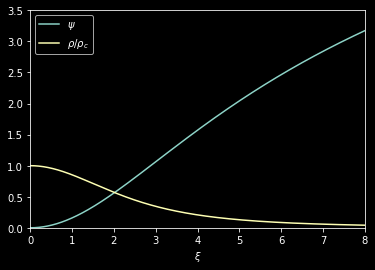

In [68]:
pl.plot(sol.t, sol.y[0], label='$\psi$')
pl.plot(sol.t, contrast(sol.y[0]), label='$\\rho/\\rho_c$')
pl.legend(loc='best')
_=pl.xlabel("$\\xi$")
_=pl.xlim(0,8)
_=pl.ylim(0,3.5)

# Part 6: Enclosed Mass

[Index](#Index)

The total mass enclosed out to a radius $R$ is
$$
M = 4\pi \int_0^R \rho r^2 \, dr.
$$
Show that this is equivalent to
$$
M =\frac{c_s^4}{\sqrt{4\pi G^3 P_s}} \left(e^{-\psi/2}\xi^2 \frac{d\psi}{d\xi}\right)_{\xi_s},
$$
where
$$\xi_s \equiv \frac{R_S}{r_0} $$
$$P_s \equiv  \rho_s c_s^2$$

$P_s$ is the pressure at the surface, and the pressure contrast is the same as the density contrast $$\frac{P}{P_c} = \frac{\rho}{\rho_c} = e^\psi$$
Hint: to evaluate the integral, it is helpful to use the isothermal Lane-Emden equation to substitute.



Solution steps:
$$\frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2 \frac{d\psi}{d\xi}\right) = e^{-\psi} = e^{-\phi/c_s^2} = \rho/\rho_c$$

$$M = 4\pi \int_0^R \rho_c \frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2 \frac{d\psi}{d\xi}\right) r^2 \, dr$$


$$M = 4\pi \int_0^{\xi_S} \rho_c \frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2 \frac{d\psi}{d\xi}\right) (r_0 \xi)^2 \, d(r_0 \xi)$$


$$M = 4\pi r_0^3 \rho_c \int_0^{\xi_S}  \frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2 \frac{d\psi}{d\xi}\right) \xi^2 \, d\xi$$


$$M = 4\pi r_0^3 \rho_c \int_0^{\xi_S} \frac{d}{d\xi}\left(\xi^2 \frac{d\psi}{d\xi}\right) \, d\xi$$


$$M = 4\pi r_0^3 \rho_c \left(\xi^2 \frac{d\psi}{d\xi}\right)_0^{\xi_S} $$


$$ r_0 = \sqrt{\frac{c_s^2}{\rho_c 4 \pi G}}$$

$$M = 4\pi \frac{c_s^3}{(4 \pi G \rho_c)^{3/2}} \rho_c \left(\xi^2 \frac{d\psi}{d\xi}\right)_0^{\xi_S} $$


$$M = \frac{c_s^3}{(4 \pi \rho_c G^3 )^{1/2}} \left(\xi^2 \frac{d\psi}{d\xi}\right)_0^{\xi_S} $$


$\rho_S = \rho_c e^{-\psi}$ evaluated at the surface
$$P_S=\rho_S c_s^2 = \rho_c c_s^2 e^{-\psi_S}$$
$$\rho_c = P_S c_s^{-2} e^{\psi_S}$$

The provided solution from Krumholz is useful for finding the surface:

$$M = \frac{c_s^3}{(4 \pi  P_S c_s^{-2} e^{\psi_S} G^3 )^{1/2}} \left(\xi^2 \frac{d\psi}{d\xi}\right)_0^{\xi_S} $$


$$M = \frac{c_s^4}{(4 \pi  P_S  G^3 )^{1/2}} \left( e^{-\psi/2} \xi^2 \frac{d\psi}{d\xi}\right)_0^{\xi_S} $$


The correct answer for determining internal structure is:


$$M(\xi') = \frac{c_s^4}{(4 \pi  P_S  G^3 )^{1/2}} e^{-\psi_S/2} \left(  \xi^2 \frac{d\psi}{d\xi}\right)_0^{\xi'} $$


# Part 7: Dimensionless Mass

[Index](#Index)

Plot the dimensionless mass $m = M/(c_s^4/\sqrt{G^3 P_s})$ versus the dimensionless density contrast $\rho_c/\rho_s=e^{-\psi_s}$, where $\psi_s$ is the value of $\psi$ at $\xi=\xi_s$. You will see that $m$ reaches a finite maximum value $m_{\mathrm{max}}$ at a particular value of $\rho_c/\rho_s$. Numerically determine $m_{\mathrm{max}}$, along with the density contrast $\rho_c/\rho_s$ at which it occurs.


$m = M/(c_s^4/\sqrt{G^3 P_s})$ versus the dimensionless density contrast $\rho_c/\rho_s=e^{-\psi_s}$

$$ m = M \left(\frac{ c_s^4}{\sqrt{G^3 P_s}}\right)^{-1} $$

$$ m =  \left(\frac{ c_s^4}{\sqrt{G^3 P_s}}\right)^{-1}  \frac{c_s^4}{(4 \pi  P_S  G^3 )^{1/2}} \left( e^{-\psi/2} \xi^2 \frac{d\psi}{d\xi}\right)_0^{\xi_S} $$

$$ m =  (4 \pi)^{-1/2} \left( e^{-\psi/2} \xi^2 \frac{d\psi}{d\xi}\right)_0^{\xi_S} $$

In [69]:
def dimensionless_mass(xi, psi, psiprime):
    return 1/(4*np.pi)**0.5 * np.exp(-psi/2) * xi**2 * psiprime

We use inverse contrast here because the contrast is defined as 

$\frac{\rho}{\rho_c} = e^\psi$

but we're now asking for the inverse density contrast

$\frac{\rho_c}{\rho_S} = e^{-\psi}$

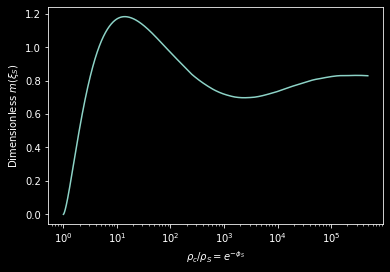

In [70]:
pl.semilogx(contrast(sol.y[0])**-1,
            dimensionless_mass(sol.t, sol.y[0], sol.y[1]))
_=pl.xlabel(r"$\rho_c/\rho_S=e^{-\phi_S}$")
_=pl.ylabel("Dimensionless $m(\\xi_S)$")

## Maximum dimensionless mass, contrast, and xi

In [71]:
maxmass=dimensionless_mass(sol.t, sol.y[0], sol.y[1]).max()
print(f"M_max = {maxmass}")
argmax = np.argmax(dimensionless_mass(sol.t, sol.y[0], sol.y[1]))
maxcontrast = contrast(sol.y[0])[argmax]**-1
psi_S = sol.y[0][argmax]
print(f"max contrast: {maxcontrast}")
radiusofmaxcontrast = sol.t[np.argmax(dimensionless_mass(sol.t, sol.y[0], sol.y[1]))]
print(f'radius of max contrast: {radiusofmaxcontrast}')

M_max = 1.182343216385591
max contrast: 13.983277903611476
radius of max contrast: 6.442022819605639


Palla & Stahler get M_max = 1.18 - the same - but rho/rho_c = 14.1, not 13.77 (with higher resolution in the solver, my number went from 13.77 -> 13.984)

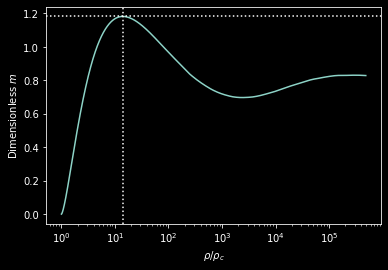

In [72]:
pl.semilogx(contrast(sol.y[0])**-1,
            dimensionless_mass(sol.t, sol.y[0], sol.y[1]))
pl.axhline(maxmass, linestyle=':')
pl.axvline(maxcontrast, linestyle=':')
_=pl.xlabel(r"$\rho/\rho_c$")
_=pl.ylabel("Dimensionless $m$")

# Part 8: Pressure for max mass

[Index](#Index)

The existence of a finite maximum $m$ implies that, for a given dimensional mass $M$, there is a maximum surface pressure $P_s$ at which a cloud of that mass can be in hydrostatic equilibrium. Solve for this maximum, and compare your result to the result you obtained in part (a).


$m = M/(c_s^4/\sqrt{G^3 P_{S,max,BE}})$

$$\frac{M}{m} = \frac{c_s^4}{\sqrt{G^3 P_{S,max,BE}}}$$

$$P_{S,max,BE} = \left(\frac{m}{M}\right)^2 c_s^8 G^{-3} = \frac{m^2 c_s^8}{G^3 M^2}$$ 

$$P_{S,max,sphere} = \left(\frac{3^7}{2^9} - \frac{3^8}{2^{11}}\right) \frac{c_s^8}{\pi a^3 G^3 M^2}
 = 1.574 \frac{c_s^8}{G^3 M^2} $$

$$P_{S,max,sphere} = \frac{1.574 }{m^2} P_{S,max,BE}$$

In [73]:
maxmass**2

1.3979354813330243

$$P_{S,max,BE} = 1.397 \frac{c_s^8}{G^3 M^2}$$ 

In [74]:
ratio_psmax_BE_to_sphere = psmax_scale / maxmass**2
ratio_psmax_BE_to_sphere 

1.125714030285814

$$P_{S,max,sph} = 1.126 P_{S,max,BE}$$

# Part 9: BE Mass

[Index](#Index)

Conversely, for a given surface pressure $P_s$ and sound speed $c_s$ there exists a maximum mass at which the cloud can be in hydrostatic equilibrium, called the Bonnor-Ebert mass $M_{\mathrm{BE}}$. Obtain an expression for $M_{\mathrm{BE}}$ in terms of $P_s$ and $c_s$. In a typical low-mass star-forming region, the surface pressure on a core might be $P_{\mathrm{s}}/k_{\rm B} = 3\times 10^5$ K cm$^{-3}$. Compute this mass for a core with a temperature of 10 K, assuming the standard mean molecular weight $\mu=2.3$.


$$M = m \frac{c_s^4}{\sqrt{G^3 P_{S,max,BE}}}$$

In [75]:
maxmass

1.182343216385591

$$M = 1.18 \frac{c_s^4}{\sqrt{G^3 P_{S,max,BE}}}$$

$$c_s = \sqrt{ \frac{k_B T}{m_{H_2}} }$$

$$M = 1.18 \frac{k_B^2 T^2}{m_{H_2}^2\sqrt{G^3 P_{S,max,BE}}}$$

$T=10$ K

$P = 3\times10^5 K k_B$

$k_B = 1.38e-16$

$$M = 1.18 \frac{k_B^2 T^2}{m_{H_2}^2\sqrt{G^3 P_{S,max,BE}}}$$

In [76]:
from astropy import units as u, constants

In [77]:
constants.G.cgs

<Quantity 6.6743e-08 cm3 / (g s2)>

In [78]:
M_BE = maxmass * (constants.k_B * 10*u.K)**2 / (2.3*u.Da)**2 / (constants.G.cgs**(3./2.)) / (3e5*u.K * constants.k_B * u.cm**-3)**0.5
M_BE.to(u.M_sun)

<Quantity 0.70022804 solMass>

In [79]:
M_BE = maxmass * (1.38e-16 * 10)**2 / (2.3 * 1.67e-24)**2 / (6.67e-8)**(3/2) / (3e5 * 1.38e-16)**0.5
M_BE / 2e33

0.6884845602624029

Consider instead a high-pressure environment like the Central Molecular Zone or a high-redshift galaxy.

In such environments, the pressure is $P_S\sim10^7$ K cm$^{-3}$ k$_B$ and temperature $T\sim50$K

In [80]:
M_BE = maxmass * (constants.k_B * 50*u.K)**2 / (2.3*u.Da)**2 / (constants.G.cgs**(3./2.)) / (1e7*u.K * constants.k_B * u.cm**-3)**0.5
M_BE.to(u.M_sun)

<Quantity 3.03207636 solMass>

# Part 10: Size and Density

[Index](#Index)

What is the radius of the Bonnor-Ebert sphere in each of the above cases?

What is the central density?

Recall $\xi \equiv r/r_0$.

We have $r_0$ as a function of $c_s$ and $\rho_c$ from Part 4:
$$ r_0 = \sqrt{\frac{c_s^2}{\rho_c 4 \pi G}} = \sqrt{\frac{c_s^2 e^{\psi_S}}{\rho_S 4 \pi G}}$$

Since $P_S = \rho_S c_s^2$, we can solve for $\rho_S$ in terms of $M$:

$$M = 1.18 \frac{c_s^4}{\sqrt{G^3 P_{S,max,BE}}}$$

$$M = 1.18 \frac{c_s^4}{\sqrt{G^3 \rho_S c_s^2}}$$

$$\rho_S = 1.18^2 \frac{c_s^6}{M^2G^3}$$

We also have from Part 6 the density contrast:
    
$$\rho / \rho_c = e^{\psi}$$
$$\rho_S / \rho_c = e^{\psi_S}$$

So 
$$\rho_c = \rho_S e^{-\psi_S} = 1.18^2 \frac{c_s^6}{M^2G^3} e^{-\psi_S}$$

$e^{-\psi_S}$ is the contrast $\rho_c/\rho_S$ evaluated at the maximum mass, i.e., it is:

In [81]:
maxcontrast

13.983277903611476

In [82]:
T = 10*u.K
mu = 2.3*u.Da
P_over_K = 3e5*u.K * u.cm**-3

c_s = np.sqrt(constants.k_B * T / mu).to(u.km/u.s)
M_BE = (maxmass * c_s**4 /
        (constants.G**(3./2.)) / (P_over_K * constants.k_B)**0.5).to(u.M_sun)
print(f"M_BE = {M_BE}")
rho_S = (maxmass**2*c_s**6 / M_BE**2 / constants.G**3).to(u.g/u.cm**3)
print(f"surface pressure={P_over_K}, rho_s c_s^2={(rho_S*c_s**2/constants.k_B).to(u.K*u.cm**-3)}")
rho_c = rho_S * maxcontrast
print(f"Central & max density: {rho_c:0.3g}, {rho_S:0.3g} = {(rho_c/mu).to(u.cm**-3):0.3g}, {(rho_S/mu).to(u.cm**-3):0.3g}")
r0 = (c_s / (4 * np.pi * constants.G * rho_c)**0.5).to(u.au)
print(f"r_0(T={T}, P={P_over_K}) = {r0}")

M_BE = 0.70022804018665 solMass
surface pressure=300000.0 K / cm3, rho_s c_s^2=300000.00000000006 K / cm3
Central & max density: 1.6e-18 g / cm3, 1.15e-19 g / cm3 = 4.19e+05 1 / cm3, 3e+04 1 / cm3
r_0(T=10.0 K, P=300000.0 K / cm3) = 1096.3933182607434 AU


In [83]:
T = 50*u.K
mu = 2.3*u.Da
P_over_K = 1e7*u.K * u.cm**-3

c_s = np.sqrt(constants.k_B * T / mu).to(u.km/u.s)
M_BE = (maxmass * c_s**4 /
        (constants.G**(3./2.)) / (P_over_K * constants.k_B)**0.5).to(u.M_sun)
print(f"M_BE = {M_BE}")
rho_S = (maxmass**2*c_s**6 / M_BE**2 / constants.G**3).to(u.g/u.cm**3)
print(f"surface pressure={P_over_K}, rho_s c_s^2={(rho_S*c_s**2/constants.k_B).to(u.K*u.cm**-3)}")

rho_c = rho_S * maxcontrast
print(f"Central & max density: {rho_c:0.3g}, {rho_S:0.3g} = {(rho_c/mu).to(u.cm**-3):0.3g}, {(rho_S/mu).to(u.cm**-3):0.3g}")
r0 = (c_s / (4 * np.pi * constants.G * rho_c)**0.5).to(u.au)
print(f"r_0(T={T}, P={P_over_K} = {r0}")

M_BE = 3.0320763562191497 solMass
surface pressure=10000000.0 K / cm3, rho_s c_s^2=9999999.999999998 K / cm3
Central & max density: 1.07e-17 g / cm3, 7.64e-19 g / cm3 = 2.8e+06 1 / cm3, 2e+05 1 / cm3
r_0(T=50.0 K, P=10000000.0 K / cm3 = 949.5044661533215 AU


# Part 11. Density Structure, now with dimensions

[Index](#Index)

Given a temperature and pressure, and therefore a Bonnor-Ebert mass, we will determine the density structure with proper dimensions.

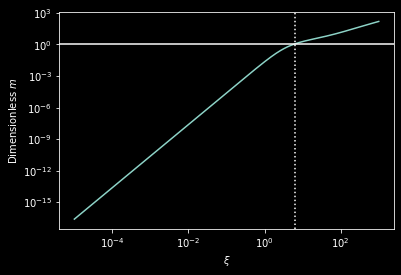

In [84]:
pl.loglog(sol.t,
            dimensionless_mass(sol.t, psi_S, sol.y[1]))
pl.axhline(maxmass)
pl.axvline(radiusofmaxcontrast, linestyle=':')
_=pl.xlabel(r"$\xi$")
_=pl.ylabel("Dimensionless $m$")

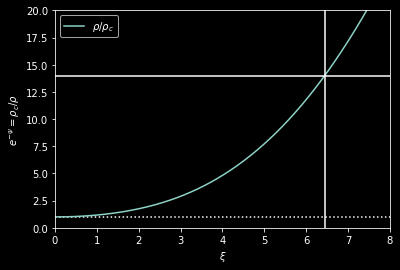

In [85]:
pl.plot(sol.t, 1/contrast(sol.y[0]), label='$\\rho/\\rho_c$')
pl.ylabel(r'$e^{-\psi} = \rho_c/\rho$')
pl.legend(loc='best')
pl.axhline(1, linestyle=':', zorder=-10)
pl.axvline(radiusofmaxcontrast)
pl.axhline(maxcontrast)
_=pl.xlabel("$\\xi$")
_=pl.xlim(0,8)
_=pl.ylim(0,20)

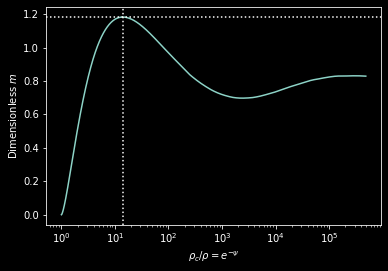

In [86]:
pl.semilogx(contrast(sol.y[0])**-1,
            dimensionless_mass(sol.t, sol.y[0], sol.y[1]))
pl.axhline(maxmass, linestyle=':')
pl.axvline(maxcontrast, linestyle=':')
_=pl.xlabel(r"$\rho_c/\rho = e^{-\psi}$")
_=pl.ylabel("Dimensionless $m$")

M_BE = 0.70022804018665 solMass
Central & max density: 1.6e-18 g / cm3, 1.15e-19 g / cm3 = 4.19e+05 1 / cm3, 3e+04 1 / cm3


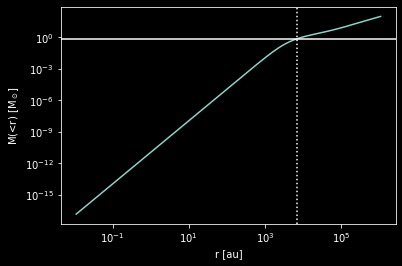

In [87]:
T = 10*u.K
mu = 2.3*u.Da
P_over_K = 3e5*u.K * u.cm**-3

c_s = np.sqrt(constants.k_B * T / mu).to(u.km/u.s)
M_BE = (maxmass * c_s**4 /
        (constants.G**(3./2.)) / (P_over_K * constants.k_B)**0.5).to(u.M_sun)
print(f"M_BE = {M_BE}")
rho_S = (maxmass**2*c_s**6 / M_BE**2 / constants.G**3).to(u.g/u.cm**3)
rho_c = rho_S * maxcontrast
print(f"Central & max density: {rho_c:0.3g}, {rho_S:0.3g} = {(rho_c/mu).to(u.cm**-3):0.3g}, {(rho_S/mu).to(u.cm**-3):0.3g}")
r0 = (c_s / (4 * np.pi * constants.G * rho_c)**0.5).to(u.au)

pl.loglog(sol.t * r0,
            dimensionless_mass(sol.t, psi_S, sol.y[1])/maxmass * M_BE)
pl.axvline(radiusofmaxcontrast * r0.value, linestyle=':')
pl.axhline(M_BE.value)
_=pl.xlabel("r [au]")
_=pl.ylabel("M(<r) [M$_\odot$]")

M_BE = 1.2128305424876595 solMass
Central & max density: 5.34e-19 g / cm3, 3.82e-20 g / cm3 = 1.4e+05 1 / cm3, 1e+04 1 / cm3
Average density = 2.950823704550615e-19 g / cm3


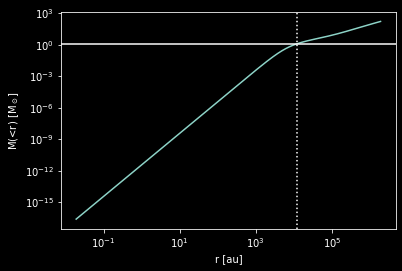

In [88]:
# for in-class demo of observability

T = 10*u.K
mu = 2.3*u.Da
P_over_K = 1e5*u.K * u.cm**-3

c_s = np.sqrt(constants.k_B * T / mu).to(u.km/u.s)
M_BE = (maxmass * c_s**4 /
        (constants.G**(3./2.)) / (P_over_K * constants.k_B)**0.5).to(u.M_sun)
print(f"M_BE = {M_BE}")
rho_S1 = (maxmass**2*c_s**6 / M_BE**2 / constants.G**3).to(u.g/u.cm**3)
rho_S = (P_over_K / c_s**2 * constants.k_B).to(u.g/u.cm**3)
assert np.abs((rho_S1 - rho_S) / rho_S) < 1e-5
rho_c = rho_S * maxcontrast
print(f"Central & max density: {rho_c:0.3g}, {rho_S:0.3g} = {(rho_c/mu).to(u.cm**-3):0.3g}, {(rho_S/mu).to(u.cm**-3):0.3g}")
r0 = (c_s / (4 * np.pi * constants.G * rho_c)**0.5).to(u.au)
print(f"Average density = {(M_BE/(4/3*(r0*radiusofmaxcontrast)**3)).to(u.g/u.cm**3)}")

pl.loglog(sol.t * r0,
            dimensionless_mass(sol.t, psi_S, sol.y[1])/maxmass * M_BE)
pl.axvline(radiusofmaxcontrast * r0.value, linestyle=':')
pl.axhline(M_BE.value)
_=pl.xlabel("r [au]")
_=pl.ylabel("M(<r) [M$_\odot$]")

### Density Profile Discrepancy

[Index](#Index)

There is a factor of about 3.70 discrepancy between these two numerical evlauations.  I don't know why.  I'm worried it could be because of a $3.52^{1/3} = 1.54$ factor in $r$, but I don't know where that would come from either.

In [89]:
4/3*np.pi

4.1887902047863905

In [90]:
3.70**(1/3)

1.5466803737720354

In [91]:
P_over_K * constants.k_B

<Quantity 1.380649e-18 J / cm3>

This version of the mass gives a density that agrees with the solution $\rho=\rho_c e^{-\psi}$

$$M = \frac{c_s^3}{(4 \pi \rho_c G^3 )^{1/2}} \left(\xi^2 \frac{d\psi}{d\xi}\right)_0^{\xi_S} $$


In [92]:
def dimensional_mass2(xi, psiprime, rho_c, c_s):
    return 1/(4*np.pi)**0.5 * xi**2 * psiprime * (c_s**3 / (constants.G**3*rho_c)**0.5).to(u.M_sun)

$\rho_S = \rho_c e^{-\psi}$ evaluated at the surface
$$P_S=\rho_S c_s^2 = \rho_c c_s^2 e^{-\psi}$$
$$\rho_c = P_S c_s^{-2} e^\psi$$

$$M = \frac{c_s^3}{(4 \pi  P_S c_s^{-2} e^\psi G^3 )^{1/2}} \left(\xi^2 \frac{d\psi}{d\xi}\right)_0^{\xi_S} $$


$$M = \frac{c_s^4}{(4 \pi  P_S  G^3 )^{1/2}} \left( e^{-\psi/2} \xi^2 \frac{d\psi}{d\xi}\right)_0^{\xi_S} $$



This expression is incorrect for the mass profile; it is only correct if evaluated at the surface:
$$M = \frac{c_s^4}{(4 \pi  P_S  G^3 )^{1/2}} \left( e^{-\psi/2} \xi^2 \frac{d\psi}{d\xi}\right)_0^{\xi_S} $$

it should be:

$$M(\xi) = \frac{c_s^4}{(4 \pi  P_S e^{\psi_S}  G^3 )^{1/2}} \left( \xi^2 \frac{d\psi}{d\xi}\right)_0^{\xi} $$


In [93]:
def dimensional_mass(xi, psi_S, psiprime, pressure, c_s):
    return 1/(4*np.pi)**0.5 * np.exp(-psi_S/2) * xi**2 * psiprime * (c_s**4 / (constants.G**3*pressure)**0.5).to(u.M_sun)

In [94]:
xi1 = np.argmin(np.abs(sol.t-1))

In [95]:
dimensional_mass(sol.t[xi1], np.log(maxcontrast), sol.y[1][xi1], P_over_K*constants.k_B, c_s)

<Quantity 0.02344054 solMass>

In [96]:
dimensional_mass2(sol.t[xi1], sol.y[1][xi1], rho_c, c_s)

<Quantity 0.02344054 solMass>

Sanity check: the mass evaluated at $\xi=\xi_S$ should be $M_{BE} = 1.21$ Msun (for c_s=0.2, P=10^5)

In [97]:
ximax = np.argmin(np.abs(sol.t-radiusofmaxcontrast))

In [98]:
(dimensional_mass(sol.t[ximax], np.log(maxcontrast), sol.y[1][ximax], P_over_K*constants.k_B, c_s),
 dimensional_mass2(sol.t[ximax], sol.y[1][ximax], rho_c, c_s))

(<Quantity 1.21283054 solMass>, <Quantity 1.21283054 solMass>)

In [99]:
rho_c.to(u.g/u.cm**3), rho_S * np.exp(psi_S), (P_over_K * constants.k_B * c_s**-2 * np.exp(psi_S)).to(u.g/u.cm**3)

(<Quantity 5.34054922e-19 g / cm3>,
 <Quantity 5.34054922e-19 g / cm3>,
 <Quantity 5.34054922e-19 g / cm3>)

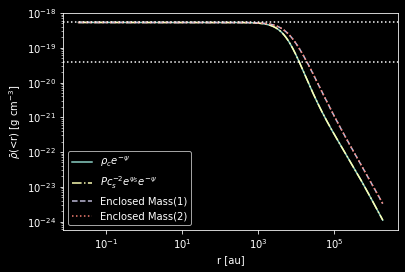

In [100]:
pl.semilogx(sol.t * r0,
            rho_c.to(u.g/u.cm**3)*np.exp(-sol.y[0]),
            label=r'$\rho_c e^{-\psi}$')

# rho_c = rho_s e^-psi = P_s c_s^-2 e^-psi
pl.semilogy(sol.t * r0,
            (P_over_K * constants.k_B * c_s**-2).to(u.cm**-3*u.g) * np.exp(psi_S) * np.exp(-sol.y[0]), linestyle='-.',
           label=r'$P c_s^{-2} e^{\psi_S} e^{-\psi}$')

pl.semilogx(sol.t * r0,
            (dimensional_mass(sol.t, psi_S, sol.y[1],
                              pressure=P_over_K*constants.k_B, c_s=c_s) / (sol.t * r0)**3 /(4/3*np.pi)).to(u.g/u.cm**3),
           linestyle='--', label='Enclosed Mass(1)')
pl.semilogx(sol.t * r0,
            (dimensional_mass2(sol.t, sol.y[1],
                              rho_c=rho_c, c_s=c_s) / (sol.t * r0)**3 /(4/3*np.pi)).to(u.g/u.cm**3),
           linestyle=':', label='Enclosed Mass(2)')

pl.axhline(rho_c.value, linestyle=':')
pl.axhline(rho_S.value, linestyle=':')
pl.legend(loc='lower left')
_=pl.xlabel("r [au]")
_=pl.ylabel(r"$\bar{\rho}$(<r) [g cm$^{-3}$]")

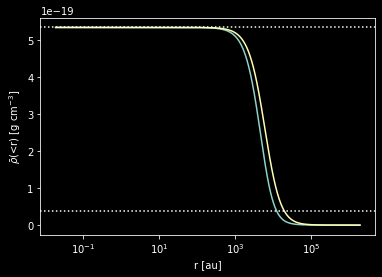

In [101]:
pl.semilogx(sol.t * r0,
            rho_c.to(u.g/u.cm**3)*np.exp(-sol.y[0]))
pl.semilogx(sol.t * r0,
            (dimensionless_mass(sol.t, psi_S, sol.y[1])/maxmass * M_BE / (sol.t * r0)**3 /(4/3*np.pi)).to(u.g/u.cm**3))
#pl.semilogx(sol.t * r0,
#            (dimensionless_mass(sol.t, psi_S, sol.y[1])/maxmass * M_BE / (sol.t * r0)**3 /(4/3*np.pi)).to(u.g/u.cm**3))
pl.axhline(rho_c.value, linestyle=':')
pl.axhline(rho_S.value, linestyle=':')
_=pl.xlabel("r [au]")
_=pl.ylabel(r"$\bar{\rho}$(<r) [g cm$^{-3}$]")

## Re-evaluate for Galactic Center-like case

[Index](#Index)

M_BE = 3.0320763562191497 solMass
Central & max density: 9.033839160649842e-18 g / cm3, 6.460458858732016e-19 g / cm3


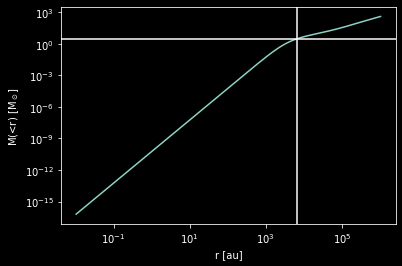

In [102]:
T = 50*u.K
mu = 2.3*u.Da
P_over_K = 1e7*u.K * u.cm**-3

c_s = np.sqrt(constants.k_B * T / mu).to(u.km/u.s)
M_BE = (maxmass * c_s**4 /
        (constants.G**(3./2.)) / (P_over_K * constants.k_B)**0.5).to(u.M_sun)
print(f"M_BE = {M_BE}")
rho_S = (maxmass*c_s**6 / M_BE**2 / constants.G**3).to(u.g/u.cm**3)
rho_c = rho_S * maxcontrast
print(f"Central & max density: {rho_c}, {rho_S}")
r0 = (c_s / (4 * np.pi * constants.G * rho_c)**0.5).to(u.au)

with quantity_support():
    pl.loglog(sol.t * r0,
                dimensionless_mass(sol.t, psi_S, sol.y[1])/maxmass * M_BE)
    pl.axhline(M_BE.value)
    pl.axvline(r0 * radiusofmaxcontrast)
    _=pl.xlabel("r [au]")
    _=pl.ylabel("M(<r) [M$_\odot$]")

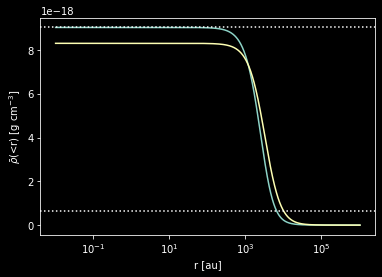

In [103]:
pl.semilogx(sol.t * r0,
            rho_c.to(u.g/u.cm**3)*np.exp(-sol.y[0]))
pl.semilogx(sol.t * r0,
            (dimensionless_mass(sol.t, psi_S, sol.y[1])/maxmass * M_BE / (sol.t * r0)**3 /(4/3*np.pi)).to(u.g/u.cm**3))
pl.axhline(rho_c.value, linestyle=':')
pl.axhline(rho_S.value, linestyle=':')
_=pl.xlabel("r [au]")
_=pl.ylabel(r"$\bar{\rho}$(<r) [g cm$^{-3}$]")

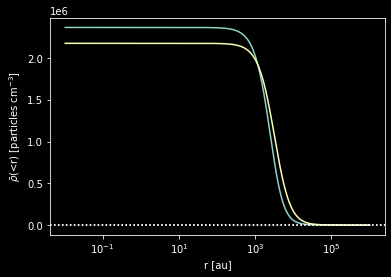

In [104]:
pl.semilogx(sol.t * r0,
            (rho_c.to(u.g/u.cm**3)*np.exp(-sol.y[0]) / mu).to(u.cm**-3))
pl.semilogx(sol.t * r0,
            (dimensionless_mass(sol.t, psi_S, sol.y[1])/maxmass * M_BE / (sol.t * r0)**3 /(4/3*np.pi) / mu).to(1/u.cm**3))
pl.axhline(rho_c.value, linestyle=':')
pl.axhline(rho_S.value, linestyle=':')
_=pl.xlabel("r [au]")
_=pl.ylabel(r"$\bar{\rho}$(<r) [particles cm$^{-3}$]")

# Part 12: Numerical Approximation

[#Index](#Index)

In [105]:
from scipy.optimize import curve_fit

## Galactic Disk case

In [106]:
T = 10*u.K
mu = 2.3*u.Da
P_over_K = 3e5*u.K * u.cm**-3

c_s = np.sqrt(constants.k_B * T / mu).to(u.km/u.s)
M_BE = (maxmass * c_s**4 /
        (constants.G**(3./2.)) / (P_over_K * constants.k_B)**0.5).to(u.M_sun)
print(f"M_BE = {M_BE}")
rho_S = (maxmass*c_s**6 / M_BE**2 / constants.G**3).to(u.g/u.cm**3)
rho_c = rho_S * maxcontrast
print(f"Central & max density: {rho_c}, {rho_S}")
r0 = (c_s / (4 * np.pi * constants.G * rho_c)**0.5).to(u.au)

M_BE = 0.70022804018665 solMass
Central & max density: 1.3550758740974767e-18 g / cm3, 9.690688288098028e-20 g / cm3


In [107]:
rho_c_vol = (rho_c/mu).to(u.cm**-3).value
r0au = r0.to(u.au).value
def f(x, c, alpha):
    return rho_c_vol * (c*r0au)**alpha/((c*r0au)**alpha + x**alpha)
xdata = sol.t*r0.value
ydata = (rho_c.to(u.g/u.cm**3)*np.exp(-sol.y[0]) / mu).to(u.cm**-3).value

(sc, alpha), _ = curve_fit(f, xdata[xdata<1e4], ydata[xdata<1e4], p0=[2.2, 2.4])
print(sc, alpha)

2.2431906540112743 2.3328466720844423


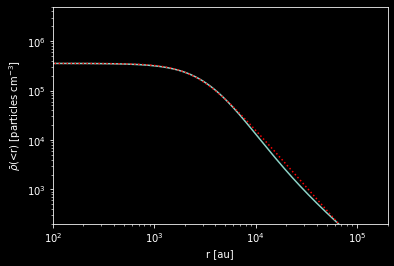

In [108]:
pl.semilogx(sol.t * r0,
            (rho_c.to(u.g/u.cm**3)*np.exp(-sol.y[0]) / mu).to(u.cm**-3))
rr = np.logspace(1,6,10000)*u.au
pl.loglog(rr,
        (rho_c*(sc*r0)**alpha/((sc*r0)**alpha+rr**alpha)/mu).to(u.cm**-3), color='r', linestyle=':')
pl.axhline(rho_c.value, linestyle=':')
pl.axhline(rho_S.value, linestyle=':')
_=pl.xlabel("r [au]")
_=pl.ylabel(r"$\bar{\rho}$(<r) [particles cm$^{-3}$]")
_=pl.xlim(1e2,2e5)
_=pl.ylim(200,5e6)

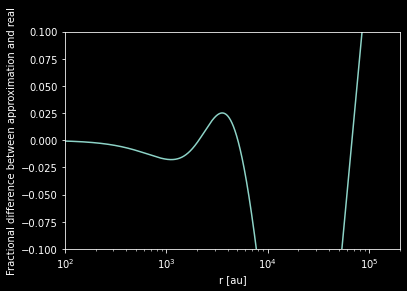

In [109]:
appr = (rho_c*(sc*r0)**alpha/((sc*r0)**alpha+(sol.t*r0)**alpha)/mu).to(u.cm**-3)
real = (rho_c.to(u.g/u.cm**3)*np.exp(-sol.y[0]) / mu).to(u.cm**-3)
pl.semilogx(sol.t * r0,
            (real-appr)/real)
_=pl.xlabel("r [au]")
_=pl.ylabel(r"Fractional difference between approximation and real")
_=pl.xlim(1e2,2e5)
_=pl.ylim(-0.1,0.1)

## Numerical Approximation: Galactic Center case

[Index](#Index)

In [110]:
T = 50*u.K
mu = 2.3*u.Da
P_over_K = 1e7*u.K * u.cm**-3

c_s = np.sqrt(constants.k_B * T / mu).to(u.km/u.s)
M_BE = (maxmass * c_s**4 /
        (constants.G**(3./2.)) / (P_over_K * constants.k_B)**0.5).to(u.M_sun)
print(f"M_BE = {M_BE}")
rho_S = (maxmass*c_s**6 / M_BE**2 / constants.G**3).to(u.g/u.cm**3)
rho_c = rho_S * maxcontrast
print(f"Central & max density: {rho_c}, {rho_S}")
r0 = (c_s / (4 * np.pi * constants.G * rho_c)**0.5).to(u.au)

M_BE = 3.0320763562191497 solMass
Central & max density: 9.033839160649842e-18 g / cm3, 6.460458858732016e-19 g / cm3


In [111]:
rho_c_vol = (rho_c/mu).to(u.cm**-3).value
r0au = r0.to(u.au).value
def f(x, c, alpha):
    return rho_c_vol * (c*r0au)**alpha/((c*r0au)**alpha + x**alpha)
xdata = sol.t*r0.value
ydata = (rho_c.to(u.g/u.cm**3)*np.exp(-sol.y[0]) / mu).to(u.cm**-3).value

(sc, alpha), _ = curve_fit(f, xdata[xdata<1e4], ydata[xdata<1e4], p0=[2.2, 2.4])

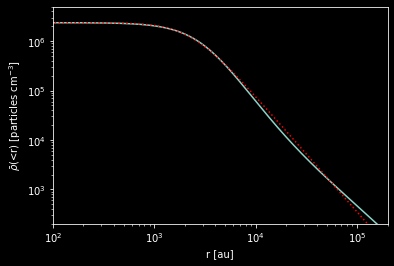

In [112]:
pl.semilogx(sol.t * r0,
            (rho_c.to(u.g/u.cm**3)*np.exp(-sol.y[0]) / mu).to(u.cm**-3))
pl.loglog(rr,
        (rho_c*(sc*r0)**alpha/((sc*r0)**alpha+rr**alpha)/mu).to(u.cm**-3), color='r', linestyle=':')
pl.axhline(rho_c.value, linestyle=':')
pl.axhline(rho_S.value, linestyle=':')
_=pl.xlabel("r [au]")
_=pl.ylabel(r"$\bar{\rho}$(<r) [particles cm$^{-3}$]")
_=pl.xlim(1e2,2e5)
_=pl.ylim(200,5e6)

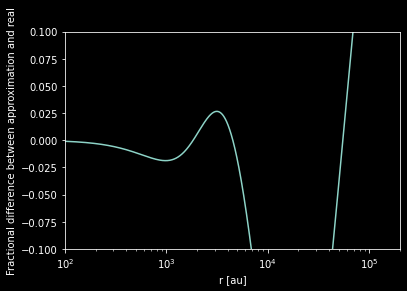

In [113]:
appr = (rho_c*(sc*r0)**alpha/((sc*r0)**alpha+(sol.t*r0)**alpha)/mu).to(u.cm**-3)
real = (rho_c.to(u.g/u.cm**3)*np.exp(-sol.y[0]) / mu).to(u.cm**-3)
pl.semilogx(sol.t * r0,
            (real-appr)/real)
_=pl.xlabel("r [au]")
_=pl.ylabel(r"Fractional difference between approximation and real")
_=pl.xlim(1e2,2e5)
_=pl.ylim(-0.1,0.1)

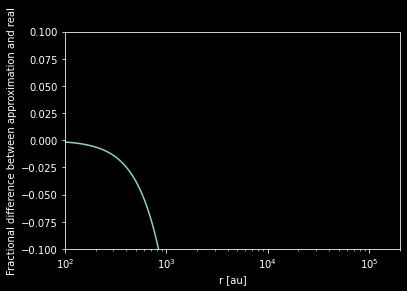

In [114]:
#appr = (rho_c*(sc*r0)**alpha/((sc*r0)**alpha+(sol.t*r0)**alpha)/mu).to(u.cm**-3)
real = (rho_c.to(u.g/u.cm**3)*np.exp(-sol.y[0]) / mu).to(u.cm**-3)
pl.semilogx(sol.t * r0,
            ((real-rho_c/mu)/(rho_c/mu)).decompose())
_=pl.xlabel("r [au]")
_=pl.ylabel(r"Fractional difference between approximation and real")
_=pl.xlim(1e2,2e5)
_=pl.ylim(-0.1,0.1)

# B68: Is it stable?

[Index](#Index)

$ \xi_{max}(B68) = 6.9 $

this is the outer radius of B68

$\xi_{max}$ is 6.4 for a stable Bonnor-Ebert sphere.

B68 is bigger than the maximum stable Bonnor-Ebert mass.

More explanation:
$\xi_{max}$ is the shape parameter that governs the structure of a core that is in pressure equilibrium with its surroundings.

If a core is in pressure equilibrium, but is larger than the maximum stable mass, it is in an unstable equilibrium.

# B68: What is $\rho_c$?

[Index](#Index)

D=128 pc, $r_{max}=150"$, T=10.5 K

Recall $\xi = r/r_0$ (so $\xi_{max} = r_{max}/r_0$) and Part 4.

$$ r_0 = \sqrt{\frac{c_s^2}{\rho_c 4 \pi G}}$$

$$\rho_c = \frac{c_s^2}{4 \pi r_0^2 G}$$

$$\rho_c = \frac{c_s^2}{4 \pi (r_{max} / \xi_{max})^2 G}$$

In [115]:
b68size = (128*u.pc * 150*u.arcsec).to(u.cm, u.dimensionless_angles())
b68tem = 10.5*u.K
mu = 2.33
c_s = (constants.k_B * b68tem / (mu*u.Da))**0.5
b68_ximax = 6.9
b68contrast = 1/contrast(sol.y[0])[np.argmin(np.abs(sol.t-b68_ximax))]

In [116]:
b68density = (c_s**2 / (4*np.pi*(b68size/b68_ximax)**2 * constants.G)).to(u.g/u.cm**3)
b68density

<Quantity 2.57808288e-19 g / cm3>

In [117]:
(b68density / (mu*u.Da)).to(u.cm**-3)

<Quantity 66633.38207328 1 / cm3>

# B68: Compare pressure to ISM

[Index](#Index)

How does the external pressure compare to the ISM average value of $P=2\times10^4\mathrm{cm}^{-3}\mathrm{K}$?

Recall from part 6 that 
 $$\frac{P}{P_c} = \frac{\rho}{\rho_c} = e^\psi$$
and the ideal gas law ($P = \rho k_B T$)

$P_S = \rho_S T k_B$, so $P_S = e^{-\psi} \rho_c k_B T$

In [118]:
b68mass = 1.6*u.M_sun

In [119]:
psurf_b68 = (b68density / (mu*u.Da) * b68tem / b68contrast).to(u.K/u.cm**3)
psurf_b68

<Quantity 42283.29891963 K / cm3>

In [120]:
psmax_b68 = (1.397 * c_s**8 / constants.G**3 / b68mass**2 / constants.k_B).to(u.K*u.cm**-3)
psmax_b68

<Quantity 66269.61071797 K / cm3>